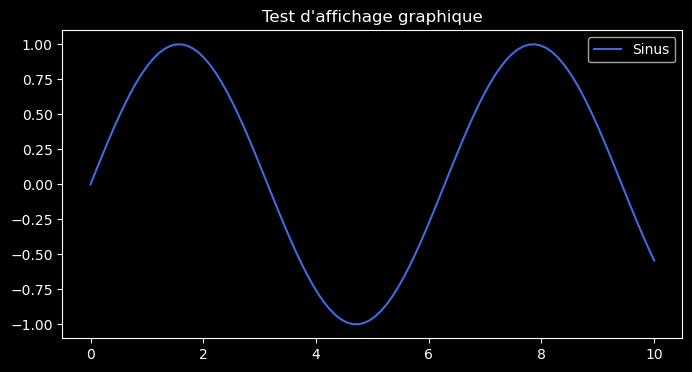

In [2]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Sinus', color='royalblue')
plt.title("Test d'affichage graphique")
plt.legend()
plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Configuration du device (ton fameux GPU !)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformations : conversion en Tensor et Normalisation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Téléchargement de MNIST
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

print(f"Dataset chargé. Utilisation de : {device}")

Dataset chargé. Utilisation de : cuda


In [4]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.fc(x)

model = SimpleNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
epochs = 3
model.train()

for epoch in range(epochs):
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        # Envoyer les données sur le GPU
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if batch_idx % 200 == 199:
            print(f'Epoch {epoch+1}, Batch {batch_idx+1}: Loss = {running_loss/200:.4f}')
            running_loss = 0.0

print("🎉 Entraînement terminé !")

Epoch 1, Batch 200: Loss = 0.5524
Epoch 1, Batch 400: Loss = 0.2417
Epoch 1, Batch 600: Loss = 0.1898
Epoch 1, Batch 800: Loss = 0.1576
Epoch 2, Batch 200: Loss = 0.1226
Epoch 2, Batch 400: Loss = 0.1094
Epoch 2, Batch 600: Loss = 0.1081
Epoch 2, Batch 800: Loss = 0.1023
Epoch 3, Batch 200: Loss = 0.0722
Epoch 3, Batch 400: Loss = 0.0741
Epoch 3, Batch 600: Loss = 0.0852
Epoch 3, Batch 800: Loss = 0.0747
🎉 Entraînement terminé !


In [6]:
# Sauvegarde des poids du modèle
torch.save(model.state_dict(), 'mnist_model.pth')
print("✅ Modèle sauvegardé sous le nom 'mnist_model.pth'")

✅ Modèle sauvegardé sous le nom 'mnist_model.pth'


Démarrage de l'entraînement sur cuda...
Epoch 1/5 - Loss: 0.0598
Epoch 2/5 - Loss: 0.0484
Epoch 3/5 - Loss: 0.0377
Epoch 4/5 - Loss: 0.0355
Epoch 5/5 - Loss: 0.0275
✨ Terminé en 38.38s


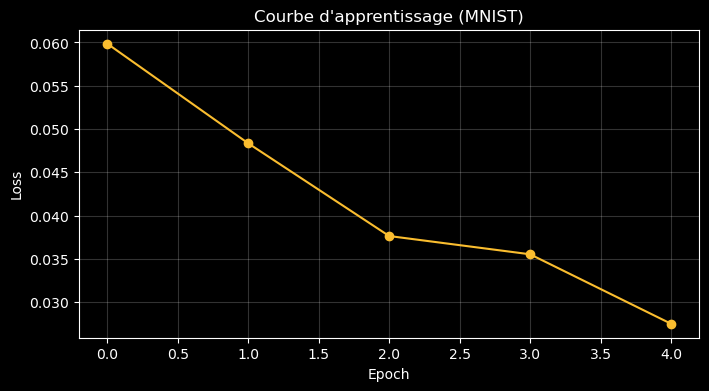

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import time

# On utilise le style dark pour coller à ton thème Gruvbox
plt.style.use('dark_background')

def train_and_plot(epochs=5):
    losses = []
    model.train()
    
    print(f"Démarrage de l'entraînement sur {device}...", flush=True)
    start_time = time.time()
    
    for epoch in range(epochs):
        epoch_loss = 0
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        avg_loss = epoch_loss / len(train_loader)
        losses.append(avg_loss)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}", flush=True)

    end_time = time.time()
    print(f"✨ Terminé en {end_time - start_time:.2f}s", flush=True)

    # Affichage de la courbe
    plt.figure(figsize=(8, 4))
    plt.plot(losses, marker='o', color='#fabd2f') # Jaune Gruvbox
    plt.title("Courbe d'apprentissage (MNIST)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(alpha=0.2)
    plt.show()

train_and_plot()